# Exam #2 Retake - FDS FALL 19' - EDA, Statistics and Preprocessing

For this part, you will work with a census data set. Please find the data file and the data dictionary attached.

<div class="alert alert-warning">
<b>Important:</b> Make sure you follow what we learned regarding what should be done on the train set and what should be done on the test set
</div>

<div class="alert alert-info">
<b>Note:</b> You should submit the answers to this question in a report format - everything you do should be documented, you should track the changes to the shape of your dataset, explain the business thought behind your decisions and make everything super clear
</div>

<div class="alert alert-warning">
<b>Important:</b> Do not perform actions that are not neccessary. Make sure there is a thought behind each step you take
</div>

**Here are some packages you will need:**

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

**Here are some helper functions for your use:**

In [2]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function gets a pandas DataFrame, and a threshold (% of data), 
    and returns the list of binary features from that dataframe that have 
    above threshold amount of samples with the same value, and thus
    should be considered redundant. 
    '''
    
    bool_cols = [col for col in data \
             if pd.Series(data[col].unique()).isin([0, 1]).all()]
    return [x for x in bool_cols if data[x].value_counts()[0] \
                                                > threshold * len(X_train)] + \
                    [x for x in bool_cols if data[x].value_counts()[1] \
                                                > threshold * len(X_train)]

`pd.to_datetime(df.Date)`: will transfer a string column to a date type

In [6]:
df = pd.read_csv('adult_data.csv')
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [9]:
with open('adult - data dictionary.names', 'r') as f:
    contents = f.read()
print(contents)

age: Age of person
workclass: Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: This is the number of people the census believes the entry represents (final weight).
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Number if years in the education system
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: 
capital-loss: 
hours-per-week

**Questions:**

1. Read the data file and present summary statistics, datatype per column and NA status for each column. 

1.b. Perform data integrity checks if needed (Don't do more than two columns)

In [10]:
# your code here
#1 - Read the data file and present summary statistics, datatype per column and NA status for each column.
df = pd.read_csv('adult_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
Unnamed: 0        32561 non-null int64
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [11]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [12]:
df.isnull().sum() #cool, no nas

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
# 1.b. Perform data integrity checks if needed (Don't do more than two columns)
df[df.duplicated()] # cool, no duplicates

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [17]:
#No dups, no nas, what else:

# If your data dictionary states that a column should have certain values and it doesn't - raise a flag - OK
# If you have columns that are dependent of eachother but the data does not present this connection - raise a flag
# If you have any duplicates - raise a flag / take care of it - DONE
# If you have rows with the same independent features but different dependent feature - raise a flag. Your model will not know how to deal with this
# DONE.

#let's check linear dependency

numerical = df.dtypes[df.dtypes != object].index.tolist()
categorical = df.dtypes[df.dtypes == object].index.tolist()
print('\nnumerical features: {}'.format(numerical))
print('categorical features: {}'.format(categorical))


numerical features: ['Unnamed: 0', 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [18]:
# what does Unnamed mean?
df['Unnamed: 0'].value_counts() # suspicious

2047     1
32069    1
5416     1
7465     1
1322     1
        ..
15026    1
12979    1
2740     1
693      1
0        1
Name: Unnamed: 0, Length: 32561, dtype: int64

In [19]:
len(df) - len(df['Unnamed: 0'].unique().tolist())

0

Ok, this feature Unnamed: 0 consists only of unique values, this is useless for any prediction, so it's a candidate to be dropped

In [40]:
# Let's checkout values of features,
for f in df.columns:
    if f != 'Unnamed: 0':
        print(f, '\n')
        print(df[f].value_counts())

age 

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
fnlwgt 

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool  

Ok, some of the features have '?' as a value, this not good, let's fix it accordong to .names file

In [61]:
for f in df.columns:
    if ' ?' in df[f].value_counts().index.tolist():
        print(f)

workclass
occupation
native-country


In [54]:
str_with_countries= 'United-States, Cambodia, England, Puerto-Rico, Canada, Germany, \
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, \
Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, \
Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, \
El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands'

for country in str_with_countries.split(', '):
    if country not in list(map(lambda x: x.strip(), df['native-country'].value_counts().index.tolist())):
        print(country)

So, for country i don't know at this point, which value stands for '?'

In [57]:
len(str_with_countries.split(',')) - len(set(df['native-country'])) # the difference is exactly '?'
# this is bad, because this value occurs often, we will replace it with 'unknown'

-1

Again, no such occupation '?' in the 'adult - data dictionary.names' file

With workclass it's even worse: besides non-existing '?' class we don't have 'Private' in the documentation

:(

Let's return to linear dependancies

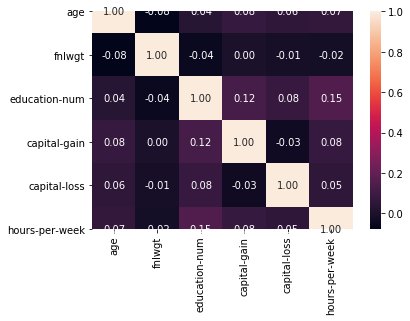

In [174]:
# relations between numerical
plt.figure()
ax = sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", square = True)

# ok, though pic looks strange, we don't see any linear correlations now between numericals

integrity checks done, Unnamed column will be dropped

OK, before plotting, let's clean up those '?' 

In [67]:
df['workclass'].replace(' ?', 'unknown', inplace=True)
df['occupation'].replace(' ?', 'unknown', inplace=True)
df['native-country'].replace(' ?', 'unknown', inplace=True)

Maybe, it will be better to transform income to bool or to 0/1

2. We are trying to Predict whether income exceeds $50K/yr, per row in the data (person). According to this research question, define the dependent variable, as well as all the categorical (nominal / ordinal) and continuous features, in a markdown cell

In [68]:
# your code here
# Defining target and features:
target = 'income'
features = df.drop(columns=[target, 'Unnamed: 0'], axis=1).columns.tolist()
df_nd = df[features + [target]].drop_duplicates()

In [143]:
df_nd = df[features + [target]].drop_duplicates()

In [106]:
numerical.remove('Unnamed: 0')

In [69]:
df_nd.columns # no useless Unnamed

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

According to this research question, define the categorical (nominal / ordinal) 
and continuous features, in a markdown cell
Indeed, here dtypes represent the class, so:

continuous features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

    
categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

In [70]:
df_nd.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

3. Plot the distribution (density plot / histogram) per feature. Make sure you use the correct plot per type of feature, and that you do not plot categorical features with unique values only.

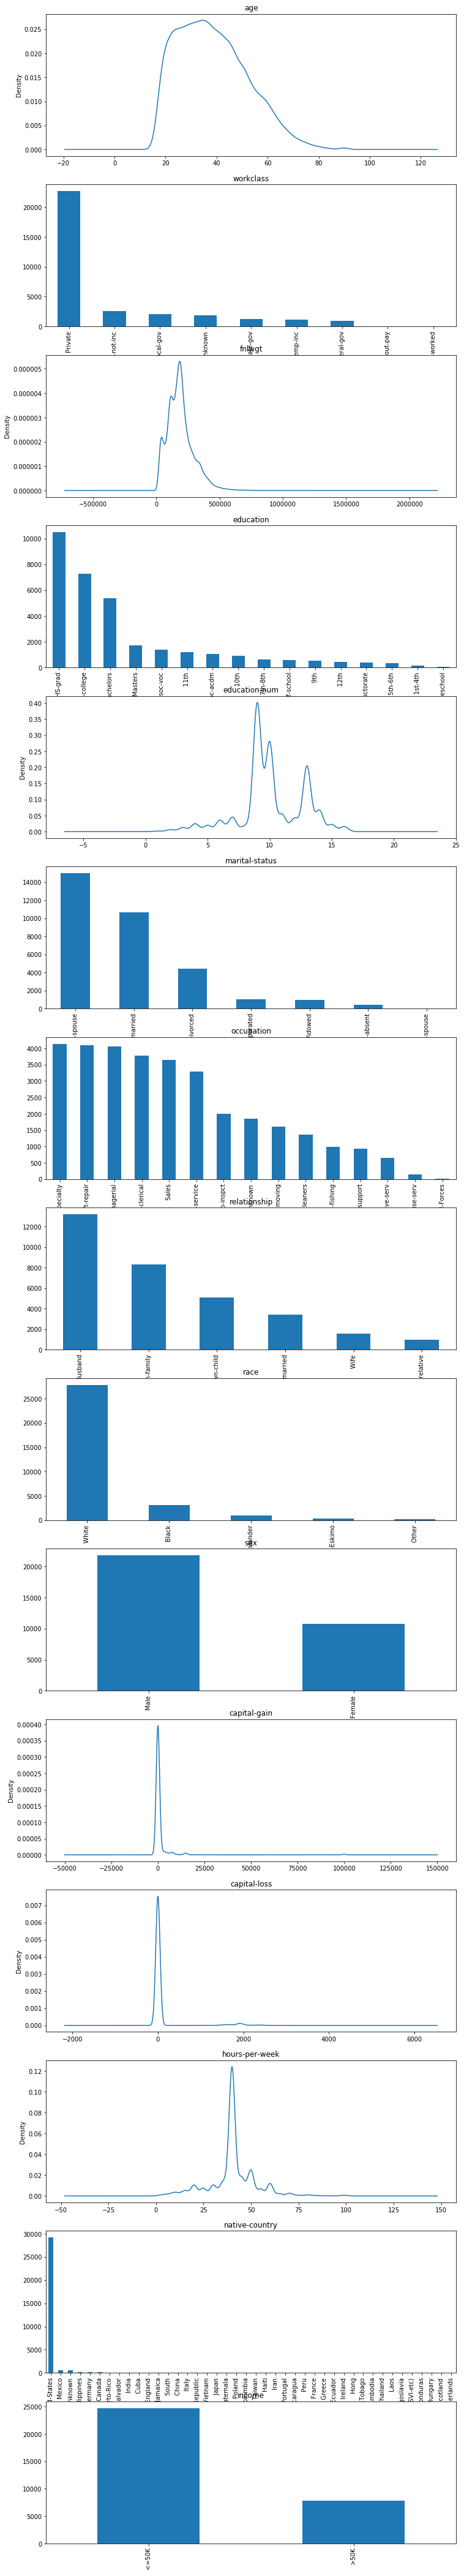

In [71]:
# cheking dists
f, axes = plt.subplots(len(df_nd.columns.tolist()), 1, figsize=(12,76))
for i, f in enumerate(df_nd.columns.tolist()):
    if df_nd[f].dtypes == object:  
        df_nd[f].value_counts().plot(kind='bar',  \
                    ax=axes[i]).set_title(f)
    else:
        df_nd[f].plot(kind='kde', \
                    ax=axes[i]).set_title(f)

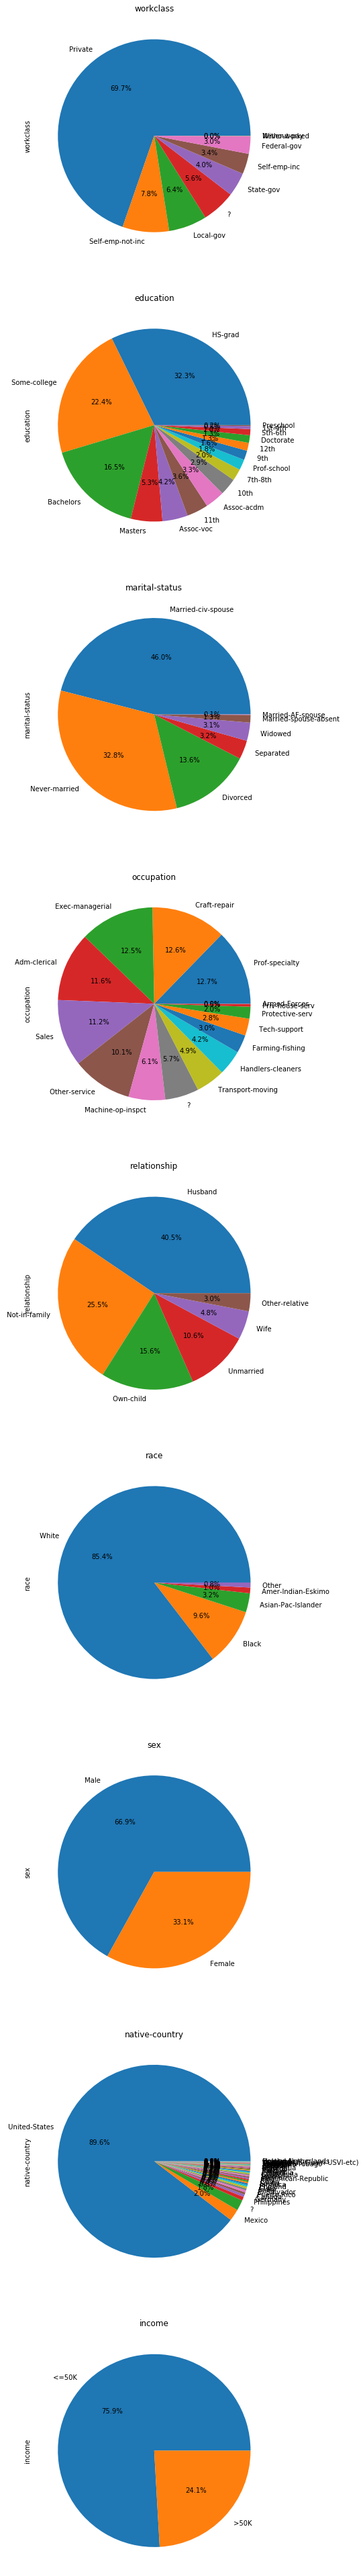

In [36]:
# cheking dists of categorical only. love pie-charts
f, axes = plt.subplots(len(categorical), 1, figsize=(12,78))
for i, f in enumerate(categorical):
    if df_nd[f].dtypes == object:
         df_nd[f].value_counts().plot(kind='pie', autopct='%1.1f%%', \
                                ax=axes[i]).set_title(f)    
#         df_nd[f].value_counts().plot(kind='bar',  \
#                     ax=axes[i]).set_title(f)
#     else:
#         df_nd[f].plot(kind='kde', \
#                     ax=axes[i]).set_title(f)

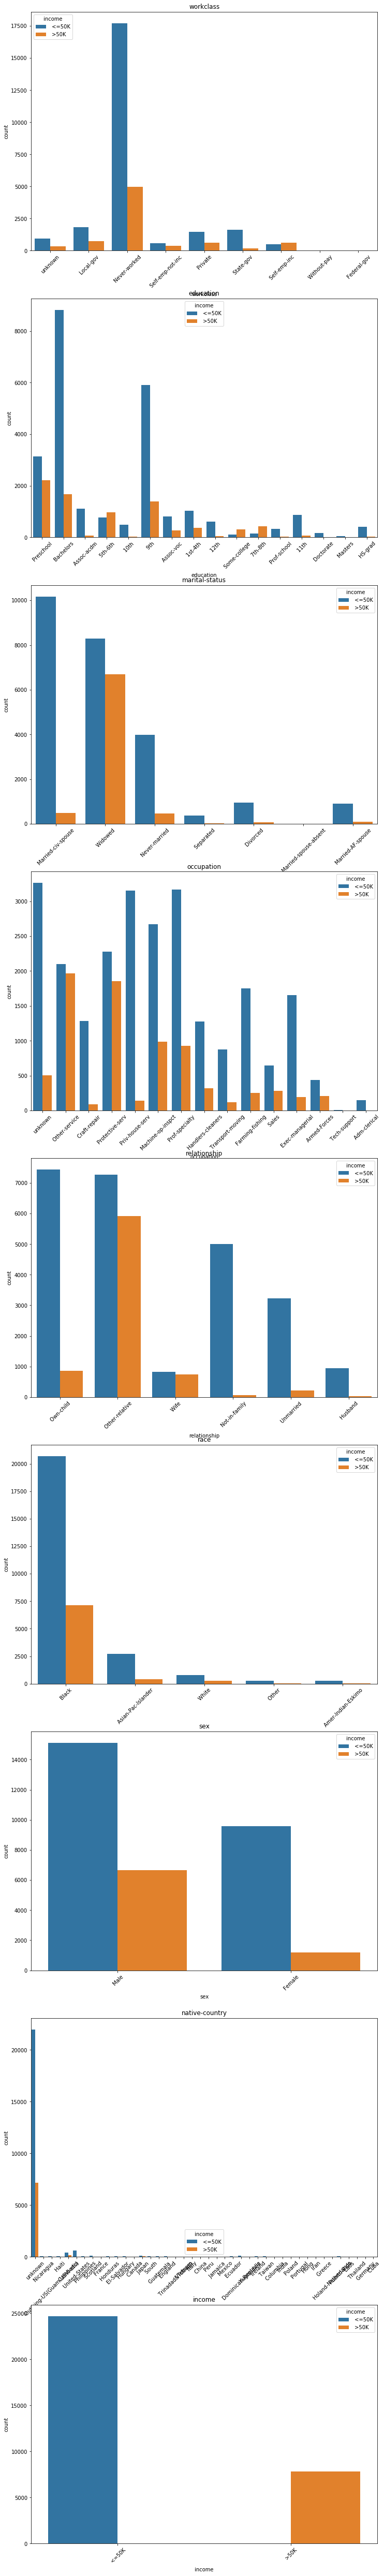

In [112]:
# your code here
# cheking dists of categorical vs target
f, axes = plt.subplots(len(categorical), 1, figsize=(12,90))
for i, f in enumerate(categorical):
    sns.countplot(x= df_nd[f], hue='income', data=df_nd,  orient='v', \
                  ax=axes[i]).set_xticklabels(labels=set(df_nd[f]), rotation=45)
    axes[i].set_title(f)

4. Split the data to a train set and a test set according to a method of your choice, and specify your business logic behind this choice 

Just want to check how numerical are distributed one against another

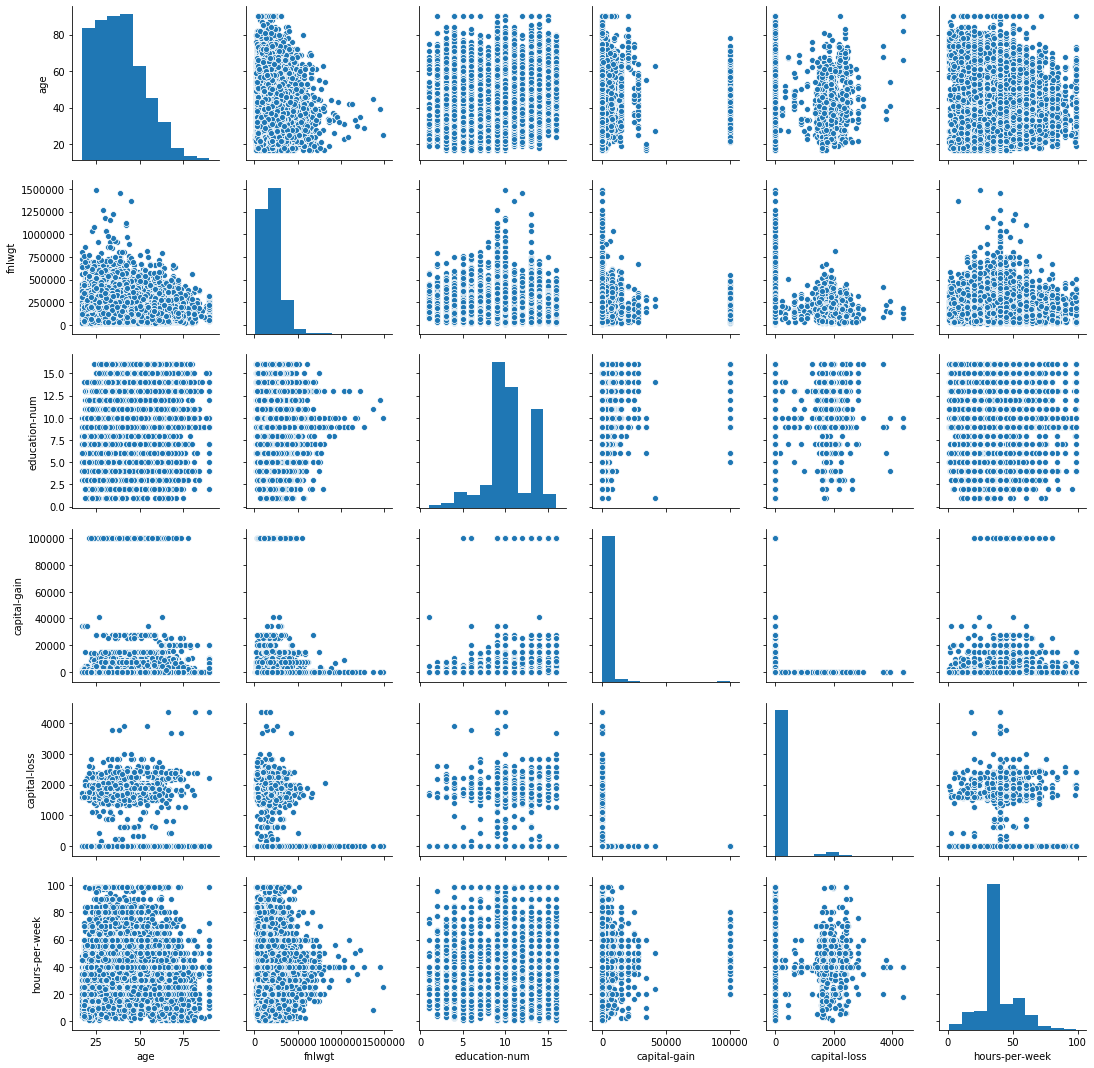

In [108]:
# relations between numerical 
sns.pairplot(df_nd[numerical]) 
             #hue='price')

Split the data to a train set and a test set according to a method of your choice, and specify your business logic behind this choice

Ok, what do we see:
    
    some of numericals are more or less evenly spread aginst ecah other
    
    
    many values of categorical features are not equally presented, especially race, country 
    (we sould look not at last bar charts, but on pie). the most unfair is country, but it's logical, since probably
    the survey was held there. So, it seems ok to split data randomly, not stratified

In [114]:
from sklearn.model_selection import train_test_split
X = df_nd[features]
y = df_nd[target]
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.20, \
                                                    random_state=42)

print('Train set size:', 100*round(len(X_train_rand)/len(df_nd),2), '%'\
      '\nTest set size:', 100*round(len(X_test_rand)/len(df_nd), 2), '%')
set(X_test_rand.index) & set(X_train_rand.index) # ok, no intersection of indices

Train set size: 80.0 %
Test set size: 20.0 %


set()

In [123]:
X_train_rand

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32239,36,Private,127573,HS-grad,9,Separated,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
30377,52,Private,114228,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,3325,0,40,United-States
5457,34,Private,209808,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
19700,54,Private,183248,HS-grad,9,Divorced,Transport-moving,Not-in-family,Black,Male,0,0,40,United-States
23197,30,Private,83253,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States
5392,63,Private,216413,Bachelors,13,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States
860,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States
15801,34,Private,242960,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States


## **Take the next steps on <span style="color:red">both datasets</span>, according to the restrictions you learned.**

5. Take care of NA values and outliers (if any). Specify the business logic behind your choice.

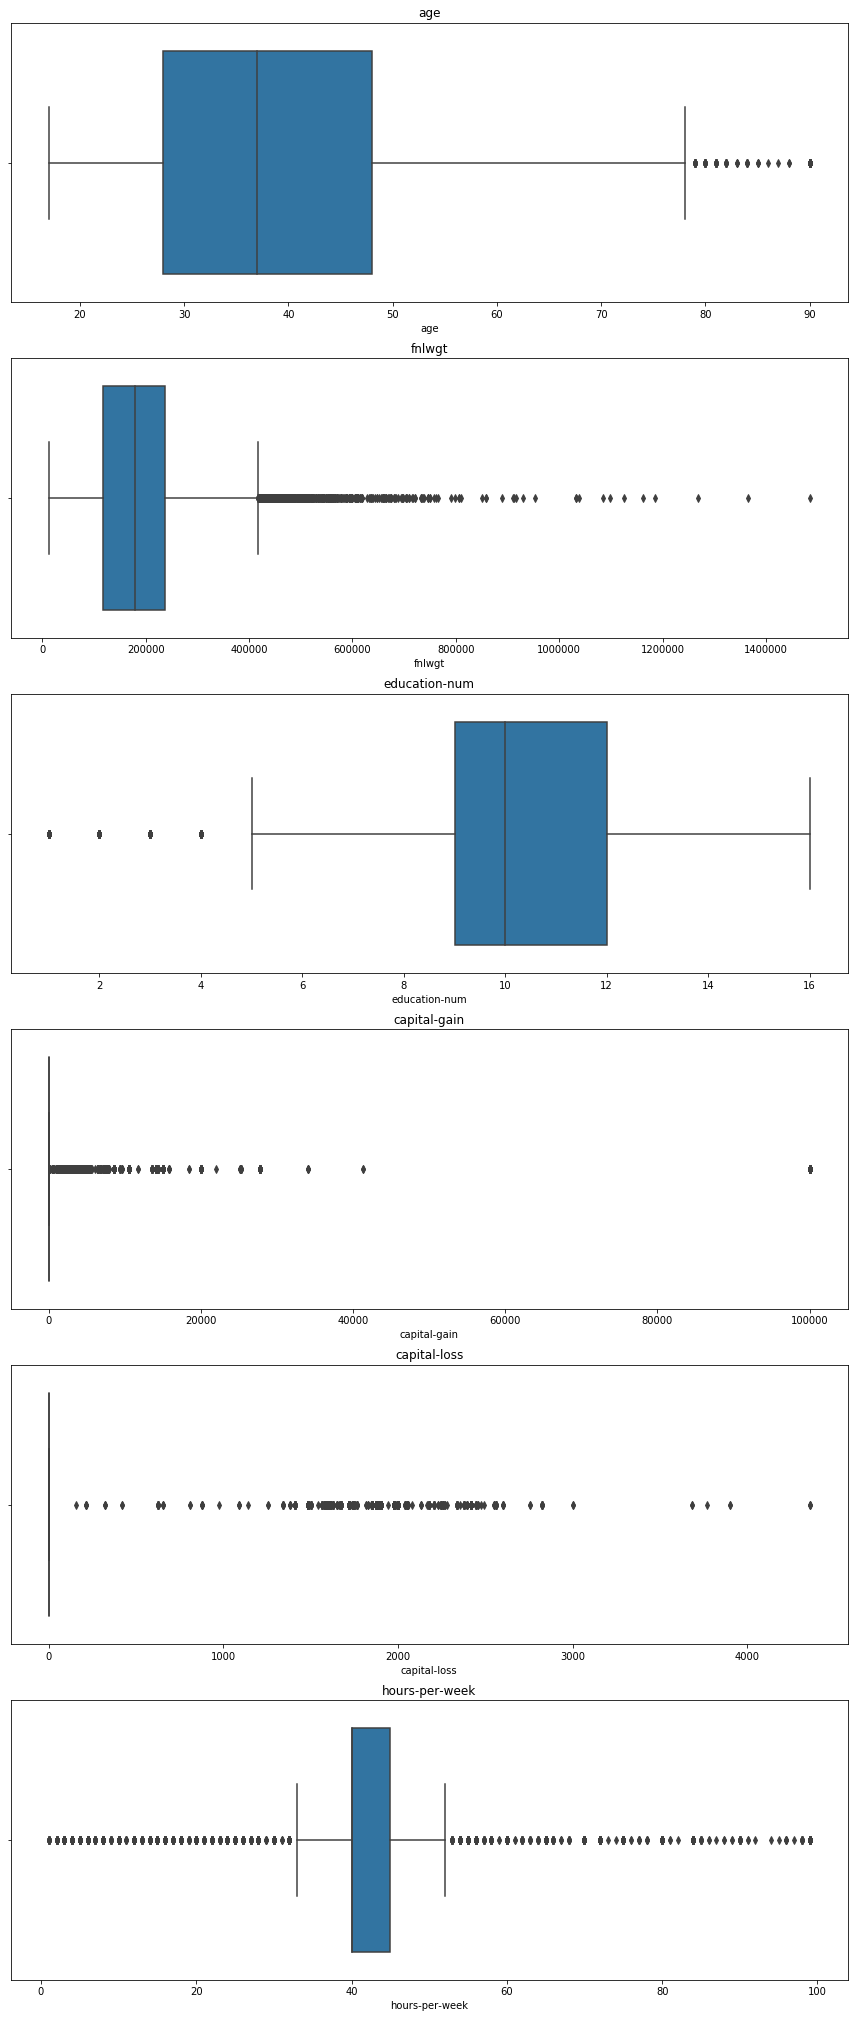

In [124]:
# your code here
# plotting numerical , easy to see outliers on boxplots
f, axes = plt.subplots(len(numerical), 1, figsize=(15,36))
for i, num_f in enumerate(numerical):
    #f, axes = plt.subplots(1, 3, figsize=(15,7))
    sns.boxplot(y= num_f, data=X_train_rand,  orient='h' , ax=axes[i]).set_title(num_f)

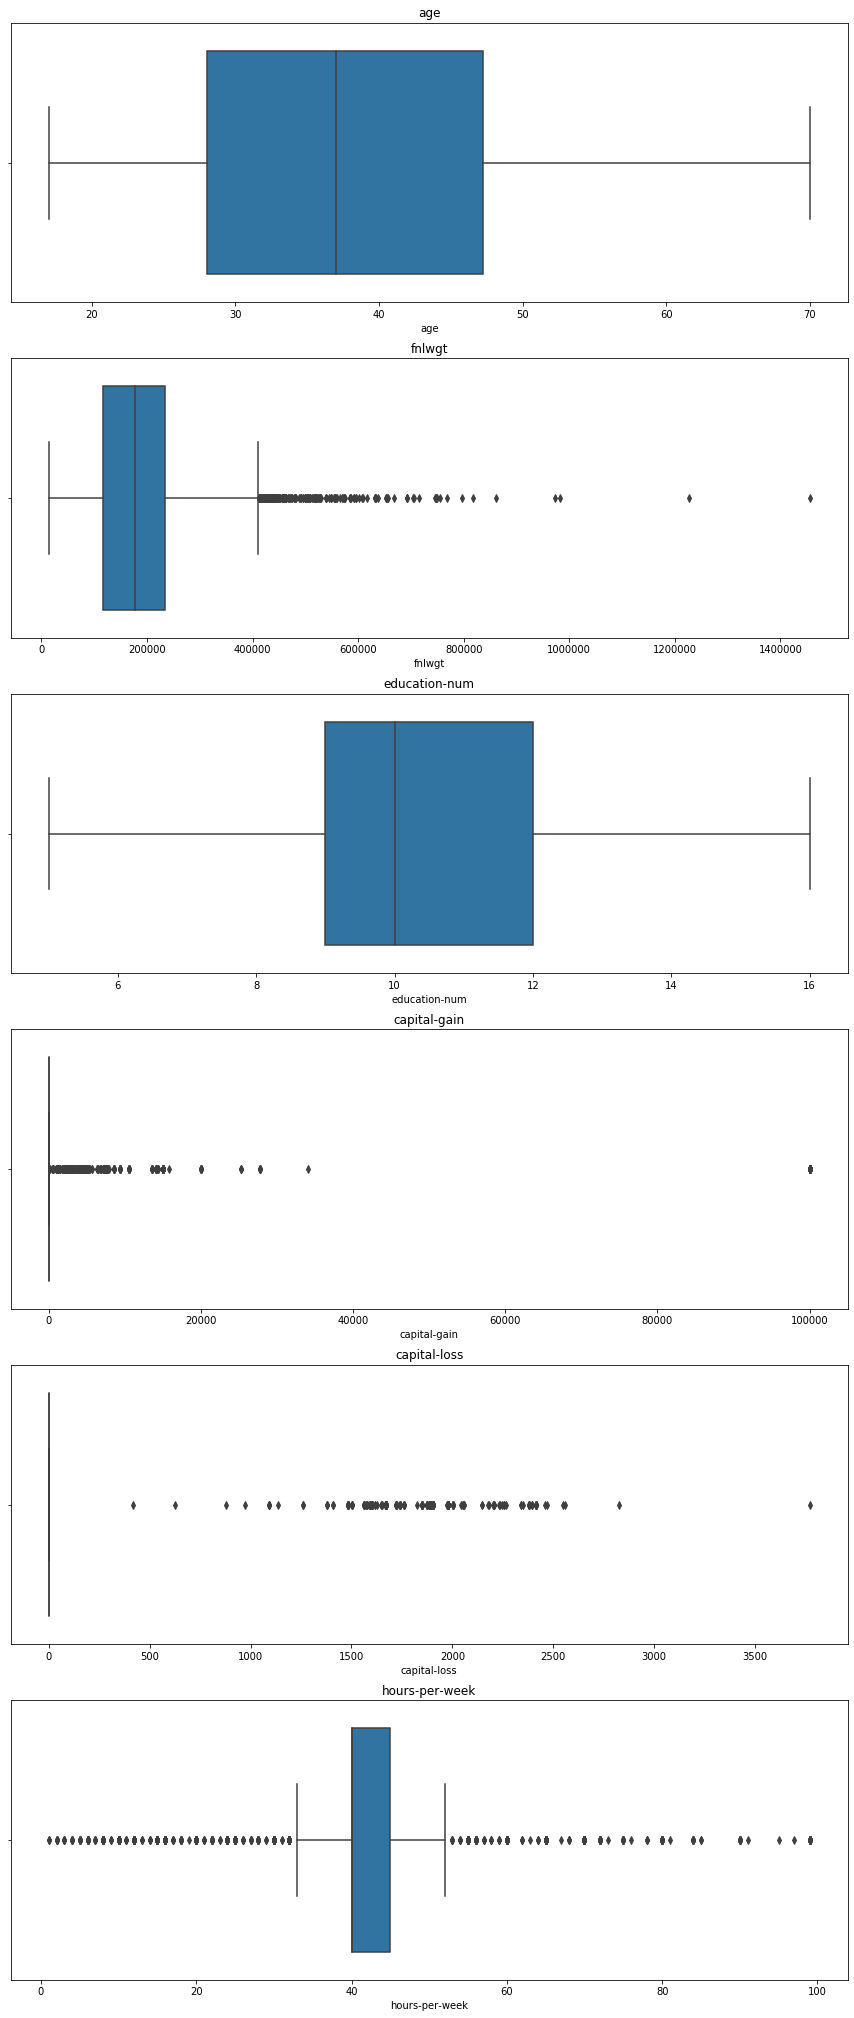

In [181]:
# your code here test set
# plotting numerical , easy to see outliers on boxplots
f, axes = plt.subplots(len(numerical), 1, figsize=(15,36))
for i, num_f in enumerate(numerical):
    #f, axes = plt.subplots(1, 3, figsize=(15,7))
    sns.boxplot(y= num_f, data=X_test_rand,  orient='h' , ax=axes[i]).set_title(num_f)

In [144]:
df_nd.iloc[X_train_rand.index.tolist()]

IndexError: positional indexers are out-of-bounds

In [142]:
X_train_rand.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [149]:
#Looking for outliers
for f in X_train_rand.columns:
    print(f)
    display(pd.DataFrame(100*X_train_rand[f].value_counts().cumsum()/len(X_train_rand)))

age


,age
23,2.769987
34,5.532291
36,8.271543
35,10.983903
33,13.684736
...,...
85,99.973107
83,99.984633
88,99.992316
87,99.996158


workclass


,workclass
Private,69.814438
Self-emp-not-inc,77.540436
Local-gov,83.960198
unknown,89.542433
State-gov,93.522609
Self-emp-inc,97.018710
Federal-gov,99.942372
Without-pay,99.980791
Never-worked,100.000000


fnlwgt


,fnlwgt
203488,0.046102
190290,0.088363
155659,0.130624
102308,0.169042
164190,0.207461
...,...
182070,99.984633
22831,99.988474
165513,99.992316
259719,99.996158


education


,education
HS-grad,32.175650
Some-college,54.700526
Bachelors,71.151408
Masters,76.376349
Assoc-voc,80.617772
11th,84.344385
Assoc-acdm,87.598448
10th,90.472166
7th-8th,92.377733
Prof-school,94.075838


education-num


,education-num
9,32.175650
10,54.700526
13,71.151408
14,76.376349
11,80.617772
7,84.344385
12,87.598448
6,90.472166
4,92.377733
15,94.075838


marital-status


,marital-status
Married-civ-spouse,45.733605
Never-married,78.627685
Divorced,92.281686
Separated,95.516539
Widowed,98.636137
Married-spouse-absent,99.915479
Married-AF-spouse,100.000000


occupation


,occupation
Prof-specialty,12.739637
Craft-repair,25.364017
Exec-managerial,37.719467
Adm-clerical,49.360329
Sales,60.716893
Other-service,70.867110
Machine-op-inspct,77.037151
unknown,82.638595
Transport-moving,87.560029
Handlers-cleaners,91.705406


relationship


,relationship
Husband,40.185946
Not-in-family,65.657536
Own-child,81.389988
Unmarried,92.093434
Wife,96.995659
Other-relative,100.000000


race


,race
White,85.304852
Black,94.967152
Asian-Pac-Islander,98.202005
Amer-Indian-Eskimo,99.147105
Other,100.000000


sex


,sex
Male,66.706366
Female,100.000000


capital-gain


,capital-gain
0,91.974336
15024,92.984748
7688,93.829959
7298,94.521495
99999,94.974836
...,...
5060,99.984633
5721,99.988474
22040,99.992316
6723,99.996158


capital-loss


,capital-loss
0,95.278343
1902,95.973722
1977,96.519267
1887,97.011026
2415,97.164701
...,...
155,99.984633
2489,99.988474
1411,99.992316
1539,99.996158


hours-per-week


,hours-per-week
40,46.813170
50,55.434323
45,60.989665
60,65.519229
35,69.606977
...,...
92,99.984633
94,99.988474
87,99.992316
82,99.996158


native-country


,native-country
United-States,89.434861
Mexico,91.424949
unknown,93.211418
Philippines,93.845326
Germany,94.264090
Canada,94.659803
Puerto-Rico,95.032464
India,95.359023
El-Salvador,95.674056
Cuba,95.981405


OK, we have outliers everywhere, but  for age, education_num, country, nationality  we can easily group some values

In [151]:
X_train_rand.age.quantile(0.98),  X_train_rand['education-num'].quantile(0.02) # yeah, 98% of samples are < 70 so, no problem

(69.0, 4.0)

In [152]:
X_train_rand.loc[X_train_rand.age > 70, 'age'] = 70
X_test_rand.loc[X_test_rand.age > 70, 'age'] = 70


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [156]:
X_train_rand.loc[X_train_rand['race']  == 'Amer-Indian-Eskimo', 'race'] =  'Other'
X_test_rand.loc[X_test_rand['race'] == 'Amer-Indian-Eskimo', 'race'] =  'Other'

6. Plot the distribution of 3 variables of your choice against the dependent variable - summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.

In [163]:
# your code here
df_trainr = pd.concat([X_train_rand, y_train_rand]) # bad thing
df_trainr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52058 entries, 32239 to 23669
Data columns (total 15 columns):
0                 26029 non-null object
age               26029 non-null float64
capital-gain      26029 non-null float64
capital-loss      26029 non-null float64
education         26029 non-null object
education-num     26029 non-null float64
fnlwgt            26029 non-null float64
hours-per-week    26029 non-null float64
marital-status    26029 non-null object
native-country    26029 non-null object
occupation        26029 non-null object
race              26029 non-null object
relationship      26029 non-null object
sex               26029 non-null object
workclass         26029 non-null object
dtypes: float64(6), object(9)
memory usage: 6.4+ MB


In [170]:
# we have already plotted all, check bars (hue=income)

7. Plot the distribution of 3 independent variables against eachother (3 plots overall), including a color bar for the dependent variable - summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.

In [382]:
# your code here


9. Generate a correlation matrix and plot a heat map of it. What can you say about the correlations?

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


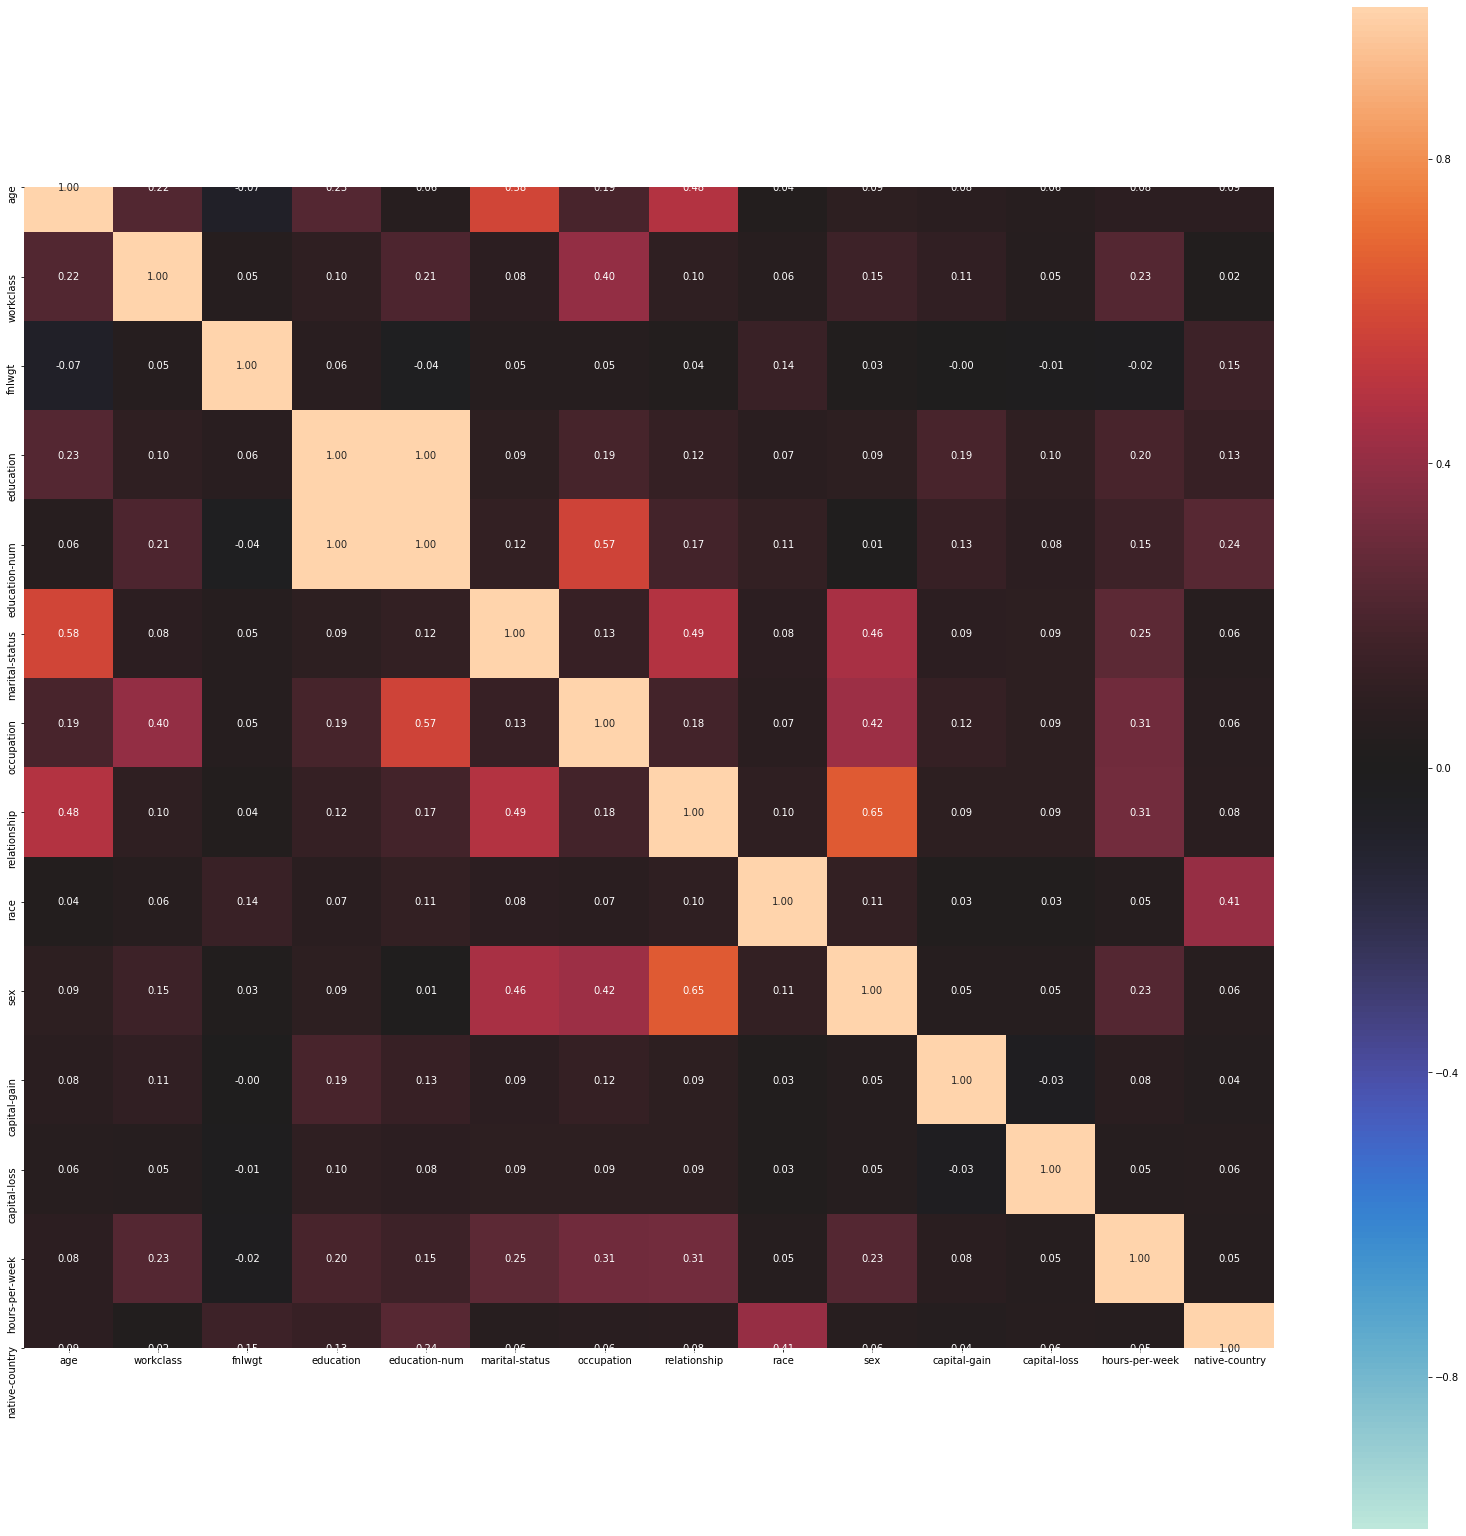

In [185]:
# your code here We have done regular corr, let's see irregular
# don't know, what's with plot
from dython.nominal import associations
associations(X_train_rand, figsize=(28, 28))

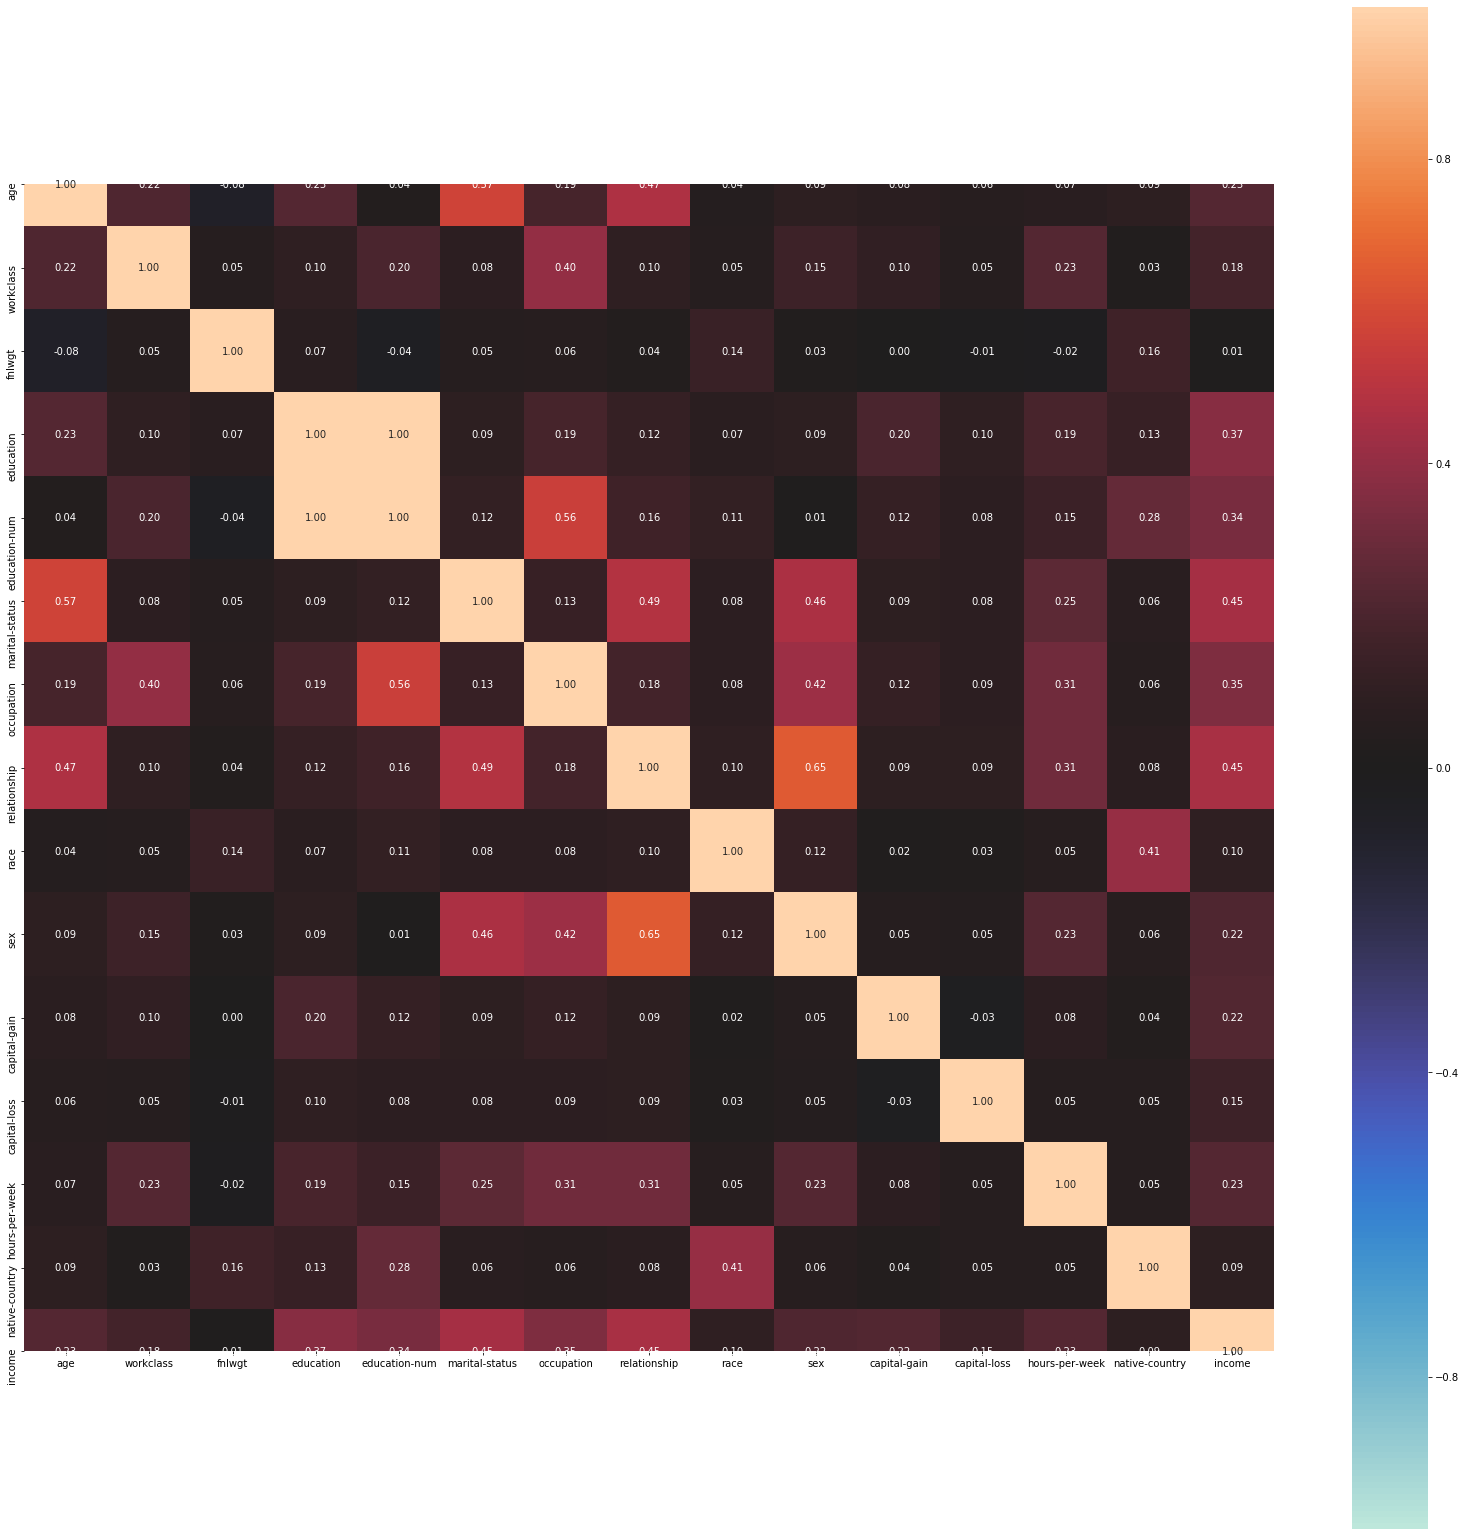

In [186]:
associations(df_nd, figsize=(28, 28))

11. Deal with 3 of the categorical features (prepare them for a model)

In [180]:
# your code here
cats = categorical[:3]
# what does this mean?
cats

['workclass', 'education', 'marital-status']

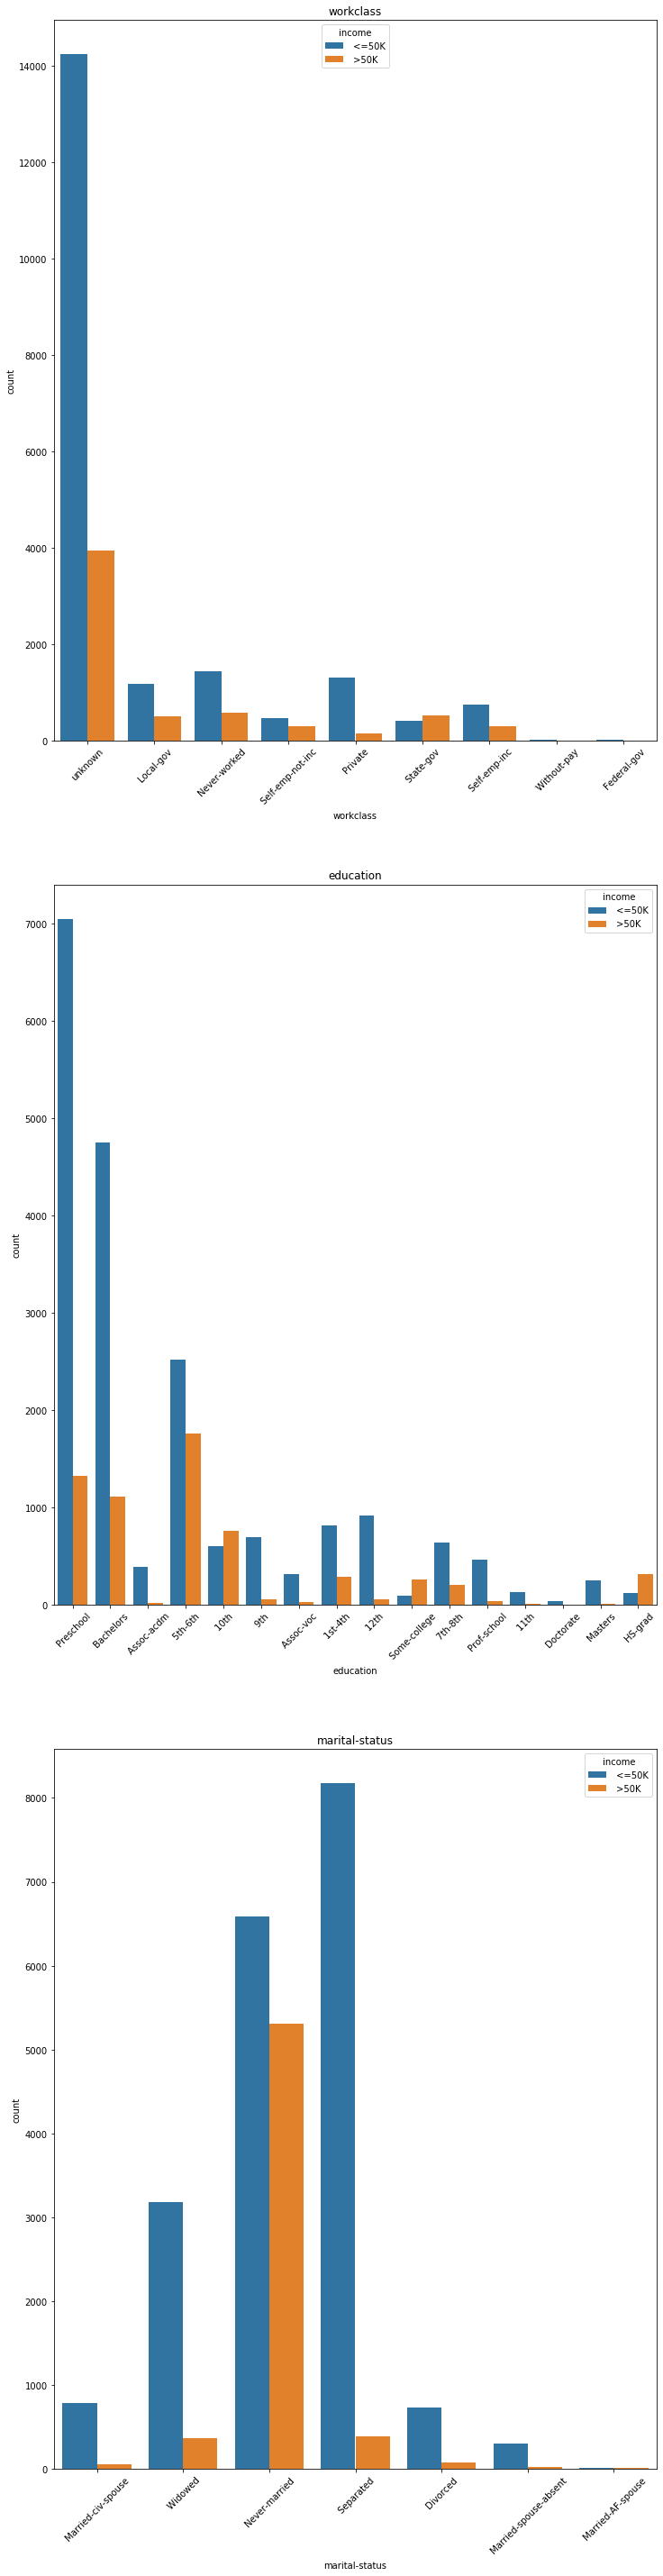

In [188]:
# your code here
# cheking dists of categorical vs target
f, axes = plt.subplots(len(cats), 1, figsize=(12,50))
for i, f in enumerate(cats):
    sns.countplot(x= X_train_rand[f], hue='income', data=df_nd,  orient='v', \
                  ax=axes[i]).set_xticklabels(labels=set(df_nd[f]), rotation=45)
    axes[i].set_title(f)

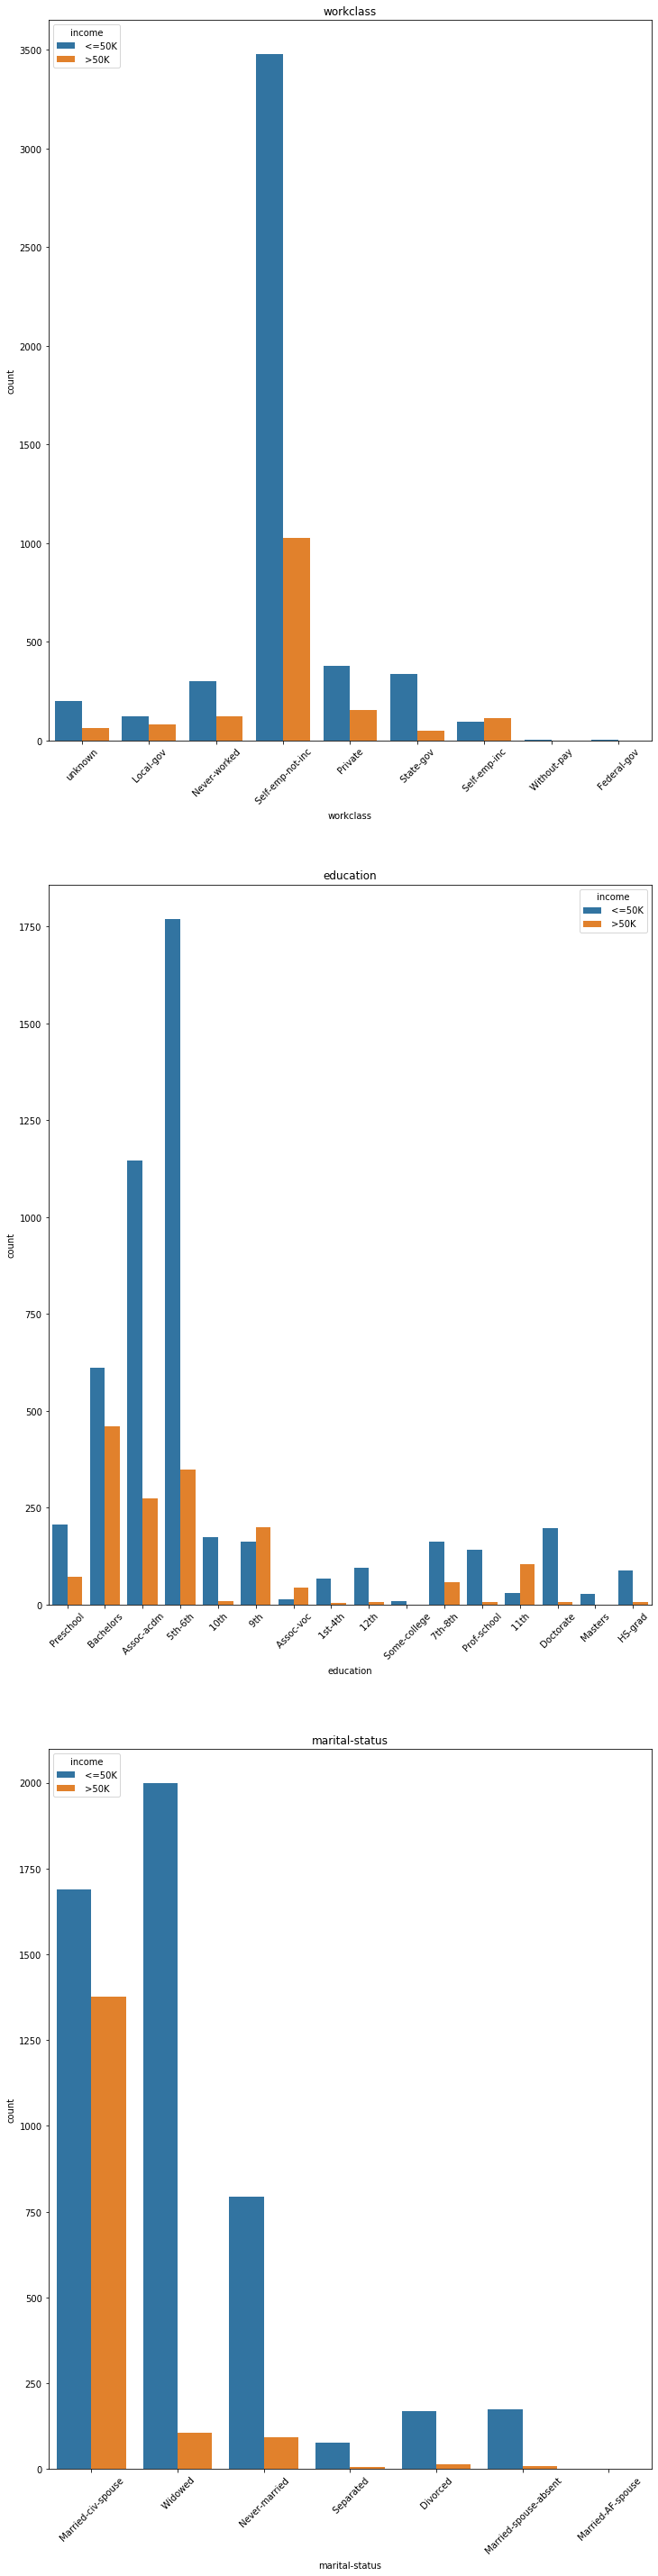

In [189]:
# your code here test set
# cheking dists of categorical vs target
f, axes = plt.subplots(len(cats), 1, figsize=(12,50))
for i, f in enumerate(cats):
    sns.countplot(x= X_test_rand[f], hue='income', data=df_nd,  orient='v', \
                  ax=axes[i]).set_xticklabels(labels=set(df_nd[f]), rotation=45)
    axes[i].set_title(f)

12. Deal with numerical features

In [208]:
# your code here
nums = numerical[:3]
nums

['age', 'fnlwgt', 'education-num']

In [194]:
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

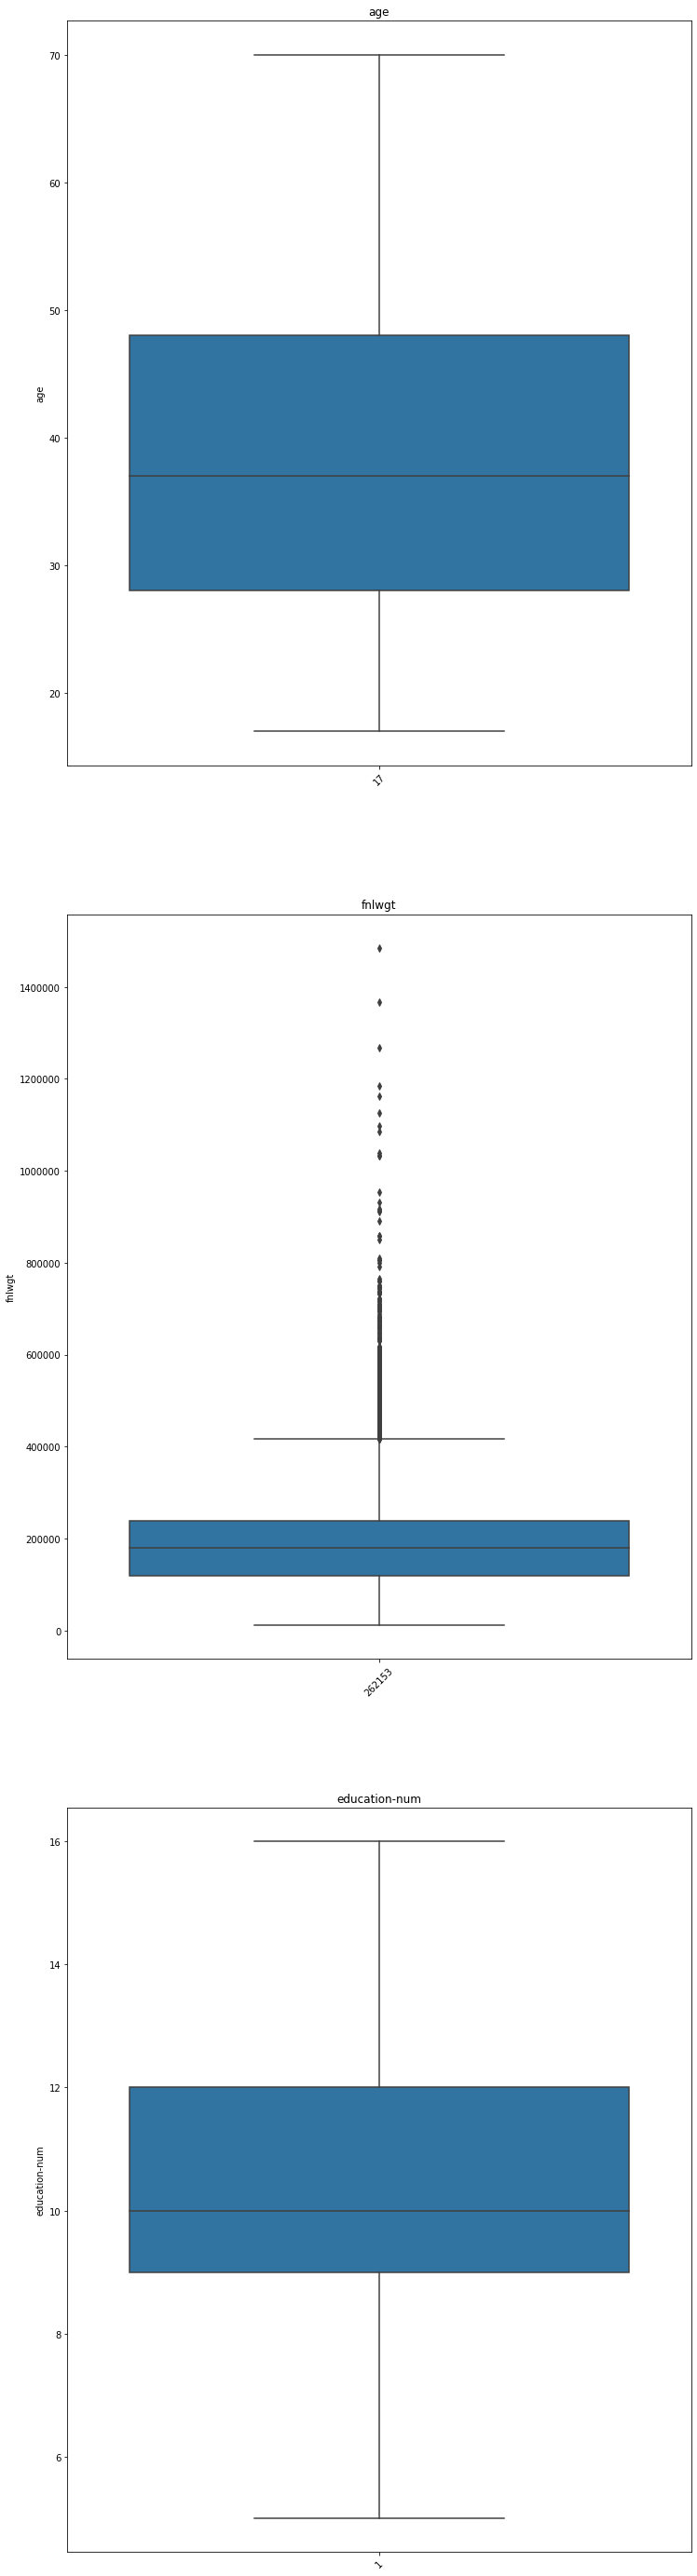

In [190]:
# your code here
# cheking dists of categorical vs target
f, axes = plt.subplots(len(nums), 1, figsize=(12,50))
for i, f in enumerate(nums):
    sns.boxplot(x= X_train_rand[f], hue='income', data=df_nd,  orient='v', \
                  ax=axes[i]).set_xticklabels(labels=set(df_nd[f]), rotation=45)
    axes[i].set_title(f)

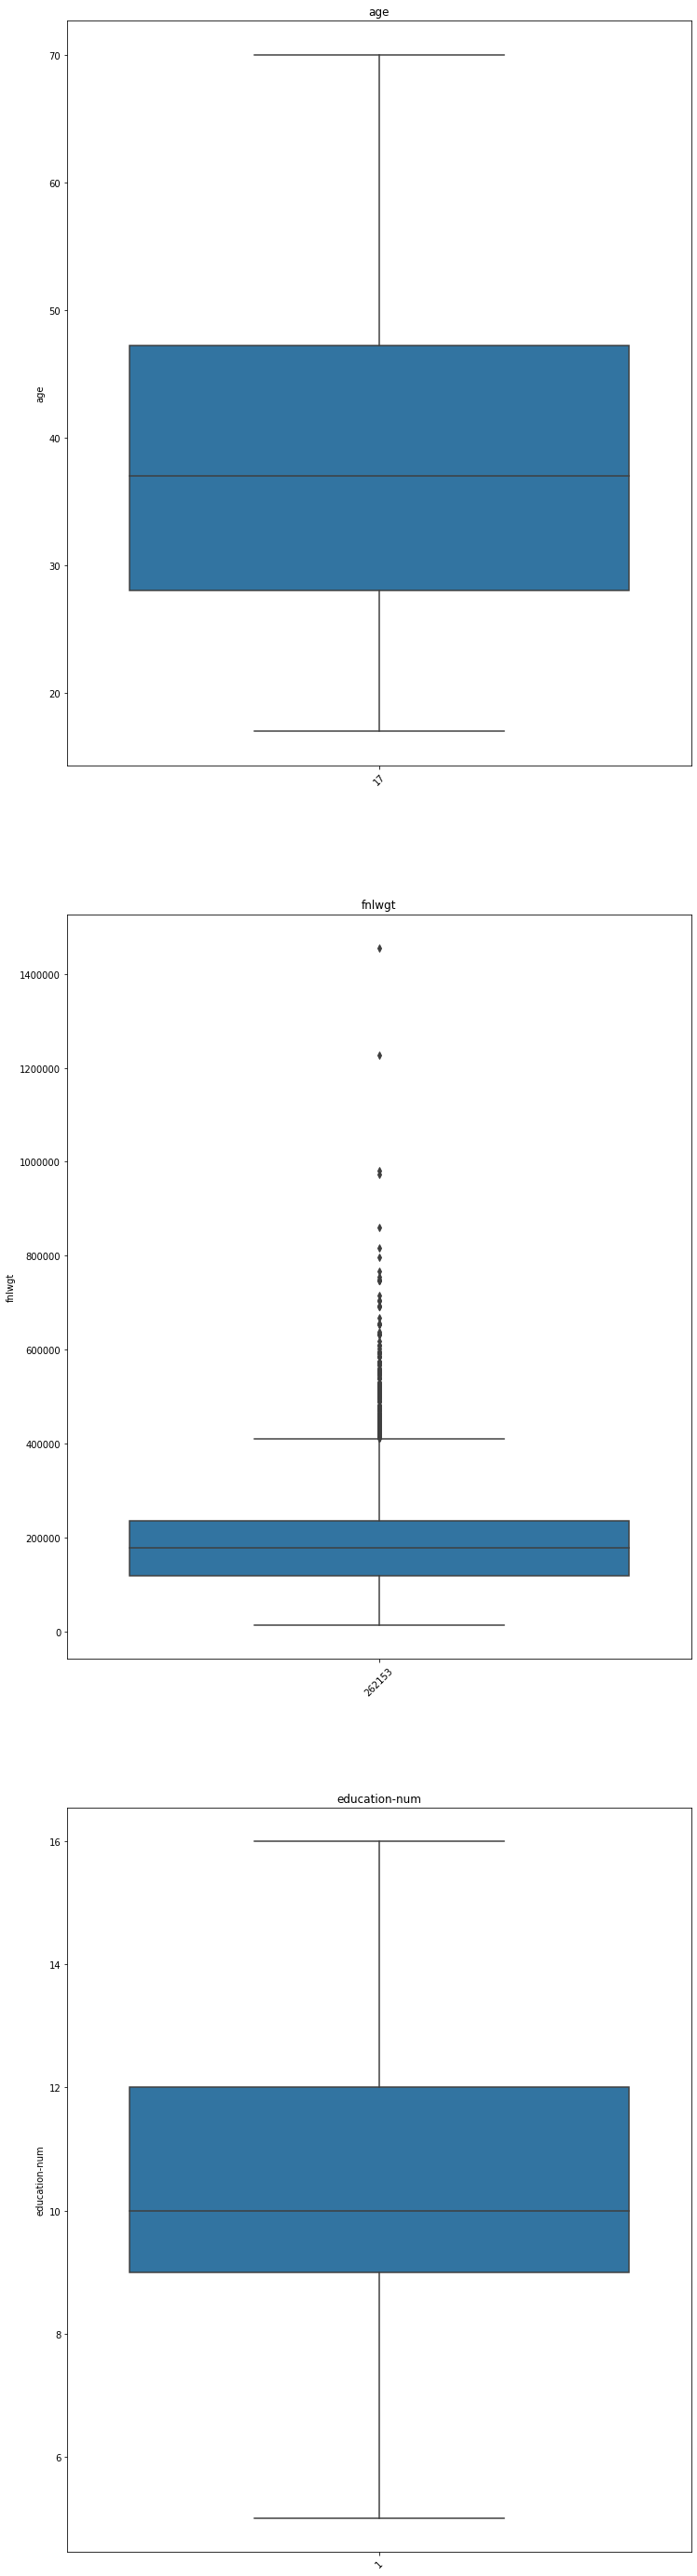

In [193]:
# your code here test set
# cheking dists of categorical vs target
f, axes = plt.subplots(len(nums), 1, figsize=(12,50))
for i, f in enumerate(nums):
    sns.boxplot(x= X_test_rand[f], hue='income', data=df_nd,  orient='v', \
                  ax=axes[i]).set_xticklabels(labels=set(df_nd[f]), rotation=45)
    axes[i].set_title(f)

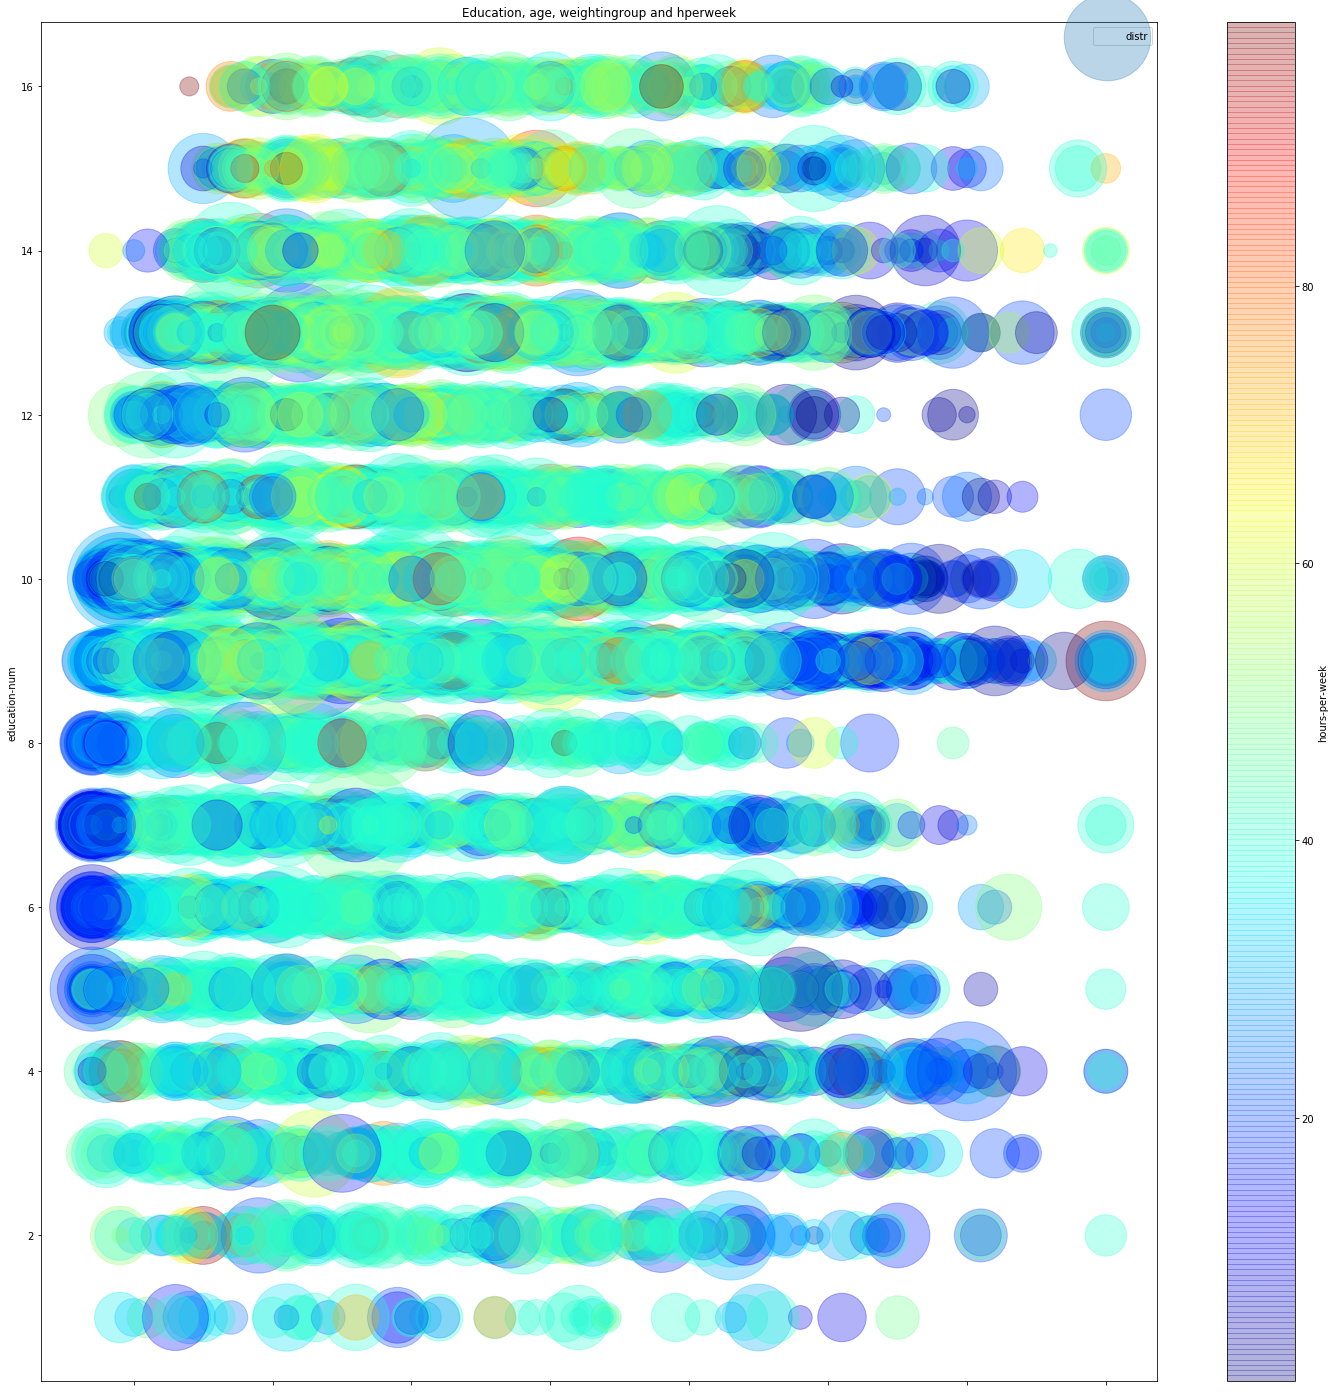

In [198]:

df_nd.plot(kind="scatter", x="age", y='education-num', alpha=0.3, s=df["fnlwgt"]/100, \
        label= "distr", figsize= (25, 25), c="hours-per-week", cmap=plt.get_cmap("jet"), colorbar=True)
plt.title('Education, age, weightingroup and hperweek')
plt.legend() 

13. Select features according to the correlations and other criteria (cardinality, value distribution, % of similar values in the column, drop ids, etc...) - see helper function. By selecting features we mean - drop any unwanted features. **Make sure you are left only with features that we can you in a model**

In [199]:
# your code here
#OK if we should select features of last 6
nums, cats

(['age', 'fnlwgt', 'education-num'],
 ['workclass', 'education', 'marital-status'])

In [211]:
for fet in nums:
    print(fet)
    print(X_train_rand[fet].value_counts())

age
23    721
34    719
36    713
35    706
33    703
31    693
28    688
25    680
30    676
27    671
37    669
38    665
32    663
29    655
40    650
41    640
39    640
24    638
26    619
42    618
22    618
43    613
20    601
44    589
45    588
46    584
47    569
19    568
21    553
70    506
50    480
51    473
49    459
48    446
18    444
52    387
53    386
54    333
55    331
17    323
56    301
57    298
59    288
58    286
60    248
61    227
62    212
63    180
64    169
65    132
66    119
67    113
69     90
68     88
Name: age, dtype: int64
fnlwgt
203488    12
190290    11
155659    11
102308    10
164190    10
          ..
182070     1
22831      1
165513     1
259719     1
229376     1
Name: fnlwgt, Length: 18469, dtype: int64
education-num
9     8375
10    5863
13    4282
14    1360
5     1344
11    1104
7      970
12     847
6      748
15     442
16     355
8      339
Name: education-num, dtype: int64


In [212]:
for fet in cats:
    print(fet)
    print(X_train_rand[fet].value_counts())

workclass
 Private             18172
 Self-emp-not-inc     2011
 Local-gov            1671
unknown               1453
 State-gov            1036
 Self-emp-inc          910
 Federal-gov           761
 Without-pay            10
 Never-worked            5
Name: workclass, dtype: int64
education
 HS-grad         8375
 Some-college    5863
 Bachelors       4282
 Masters         1360
 Assoc-voc       1104
 11th             970
 Assoc-acdm       847
 10th             748
 7th-8th          496
 Prof-school      442
 9th              412
 Doctorate        355
 12th             339
 5th-6th          259
 1st-4th          137
 Preschool         40
Name: education, dtype: int64
marital-status
 Married-civ-spouse       11904
 Never-married             8562
 Divorced                  3554
 Separated                  842
 Widowed                    812
 Married-spouse-absent      333
 Married-AF-spouse           22
Name: marital-status, dtype: int64


In fact, on bar plot we could see, that all these 6 features affected income, I wouls leave all